(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


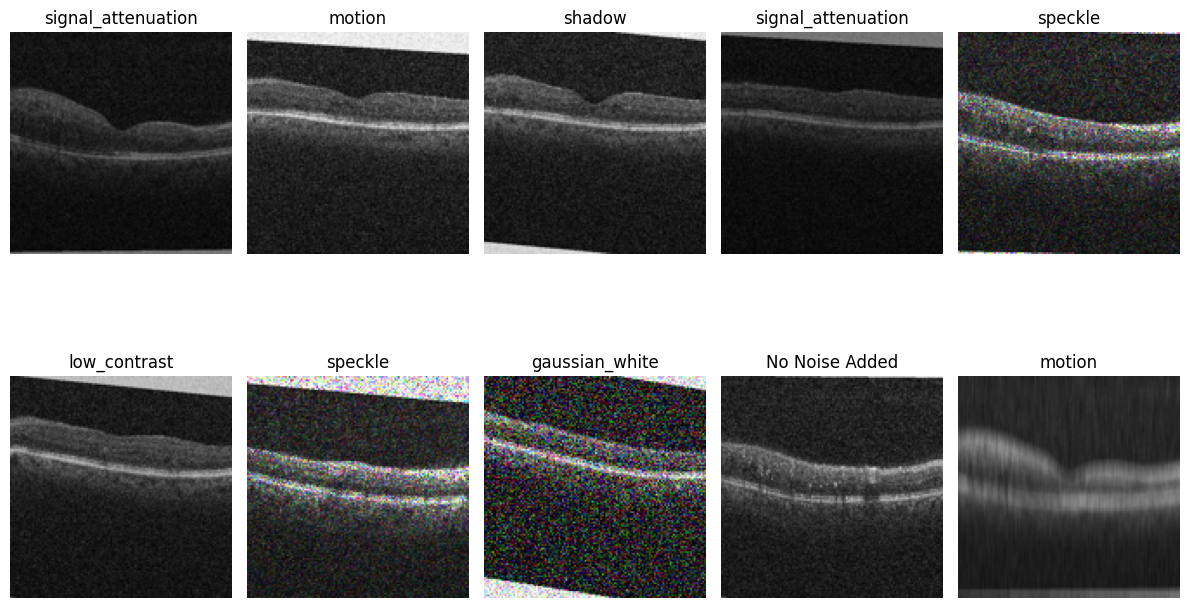

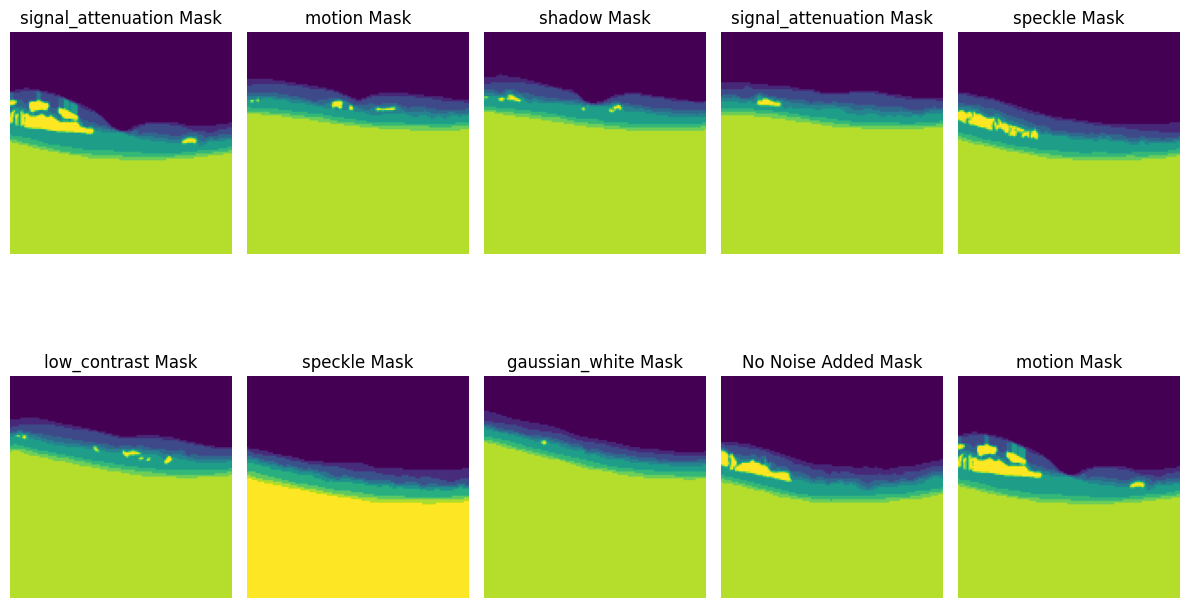

In [2]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

root_dir = 'Dataset'  # Update this to your dataset path
noisy_crops_dir = os.path.join(root_dir, 'test', 'noisy_images')  # Update this to your noisy crops path
masks_dir = os.path.join(root_dir, 'test', 'noisy_masks')  # Update this to your masks path

# List all files in the directory
image_files = os.listdir(noisy_crops_dir)

# Separate filenames based on categories
motion_files = [filename for filename in image_files if 'motion' in filename]
specle_files = [filename for filename in image_files if 'speckle' in filename]
gaussian_files = [filename for filename in image_files if 'gaussian' in filename]
noop_files = [filename for filename in image_files if 'noop' in filename]
low_contrast_files = [filename for filename in image_files if 'low_contrast' in filename]
shadow_files = [filename for filename in image_files if 'shadow' in filename]
signal_drop_files = [filename for filename in image_files if 'signal' in filename]

# Shuffle each category's filenames
random.shuffle(motion_files)
random.shuffle(specle_files)
random.shuffle(gaussian_files)
random.shuffle(noop_files)
random.shuffle(low_contrast_files)
random.shuffle(shadow_files)
random.shuffle(signal_drop_files)

# Select one image from each category and additional images if needed
selected_image_files = []
selected_image_files.extend(motion_files[:1])
selected_image_files.extend(specle_files[:2])
selected_image_files.extend(gaussian_files[:1])
selected_image_files.extend(noop_files[:1])
selected_image_files.extend(low_contrast_files[:1])
selected_image_files.extend(shadow_files[:1])
selected_image_files.extend(signal_drop_files[:2])

random.shuffle(selected_image_files)

remaining_images = 10 - len(selected_image_files)

# Randomly select remaining images from all categories
remaining_files = motion_files[1:] + specle_files[2:] + gaussian_files[1:] + noop_files[1:] + low_contrast_files[1:] + shadow_files[1:] + signal_drop_files[2:]
random.shuffle(remaining_files)
selected_image_files.extend(remaining_files[:remaining_images])

plt.figure(figsize=(12, 8))

for i, image_filename in enumerate(selected_image_files):
    image_path = os.path.join(noisy_crops_dir, image_filename)
    
    try:
        image = Image.open(image_path)
        print(image.size)
        display_name = image_filename[:-18]
        if display_name == "noop":
            display_name = "No Noise Added"
        plt.subplot(2, 5, i + 1)
        plt.imshow(image)
        plt.title(display_name)
        plt.axis('off')
    except Exception as e:
        print(f"Error displaying image {image_filename}: {e}")

plt.tight_layout()
plt.show()

# Display masks separately
plt.figure(figsize=(12, 8))

for i, image_filename in enumerate(selected_image_files):
    mask_path = os.path.join(masks_dir, image_filename)
    
    try:
        mask = Image.open(mask_path)
        
        display_name = image_filename[:-18]
        if display_name == "noop":
            display_name = "No Noise Added"
        
        plt.subplot(2, 5, i + 1)
        plt.imshow(mask)
        plt.title(display_name + ' Mask')
        plt.axis('off')
    except Exception as e:
        print(f"Error displaying mask {image_filename}: {e}")

plt.tight_layout()
plt.show()
